Load & Explore

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/UnitedSol/Downloads/house_prices_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Display basic statistics of the dataset
print(df.describe())


   Square_Footage  Num_Bedrooms  House_Age    House_Price
0            3674             1         61  608468.940708
1            1360             5         57  335254.995658
2            1794             5         51  402370.090653
3            1630             2         11  311854.298045
4            1595             5         38  379356.590435
Square_Footage    0
Num_Bedrooms      0
House_Age         0
House_Price       0
dtype: int64
       Square_Footage  Num_Bedrooms   House_Age    House_Price
count      100.000000    100.000000  100.000000     100.000000
mean      2368.700000      2.970000   47.780000  449659.080684
std       1018.723617      1.480206   31.132684  154305.631374
min        521.000000      1.000000    0.000000  133560.988172
25%       1566.750000      1.000000   19.000000  313684.825488
50%       2468.000000      3.000000   50.000000  450938.501852
75%       3288.750000      4.000000   72.500000  568634.253802
max       3999.000000      5.000000   98.000000  756310

***Visualize the Data***

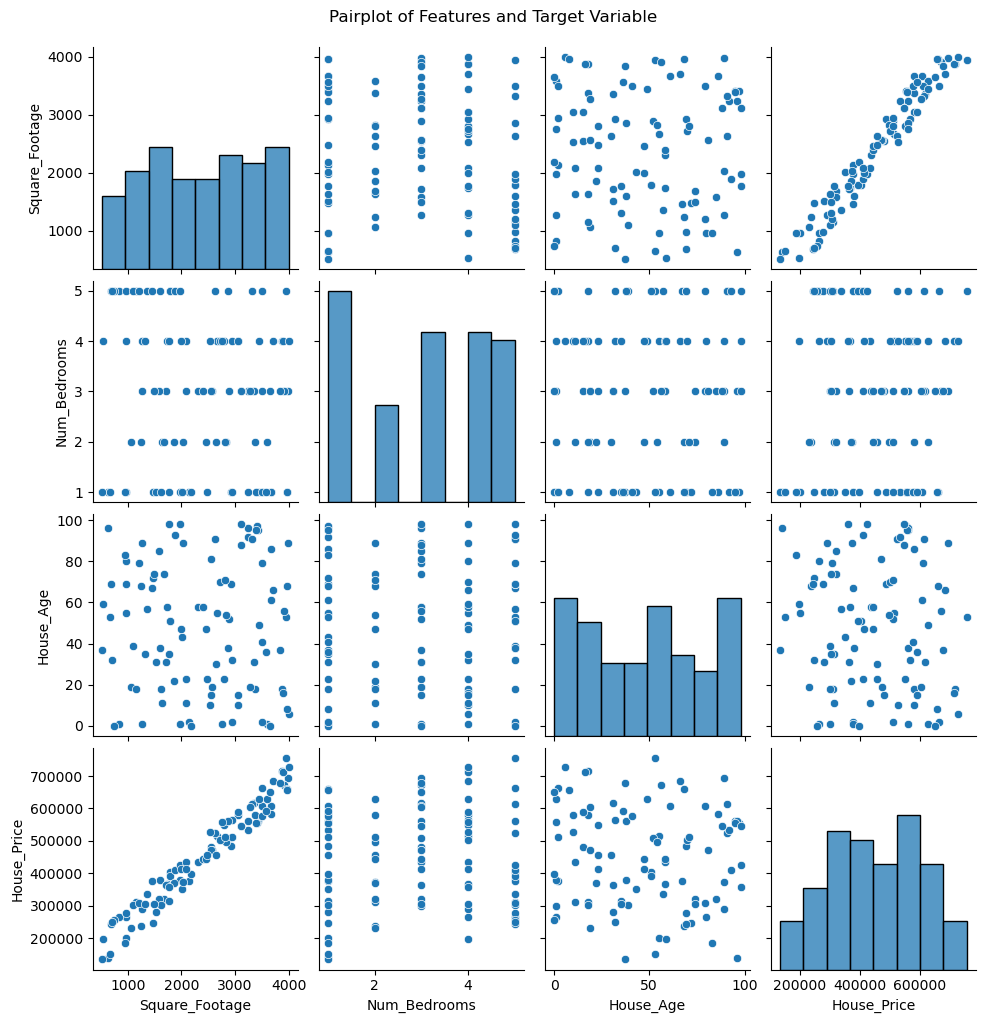

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to show the pairwise relationships between all variables
sns.pairplot(df)
plt.suptitle("Pairplot of Features and Target Variable", y=1.02)
plt.show()


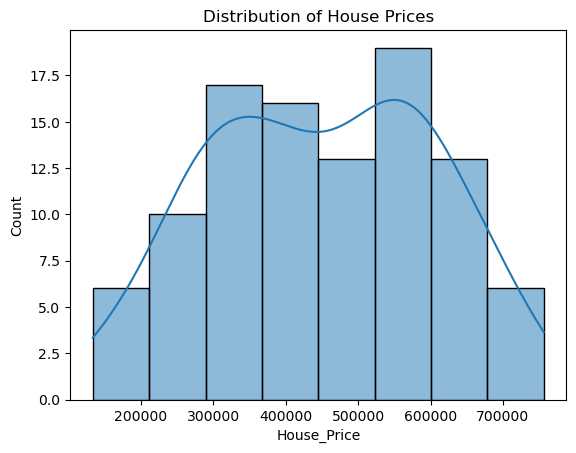

In [13]:
# Distribution plot for House Price
sns.histplot(df['House_Price'], kde=True)
plt.title("Distribution of House Prices")
plt.show()



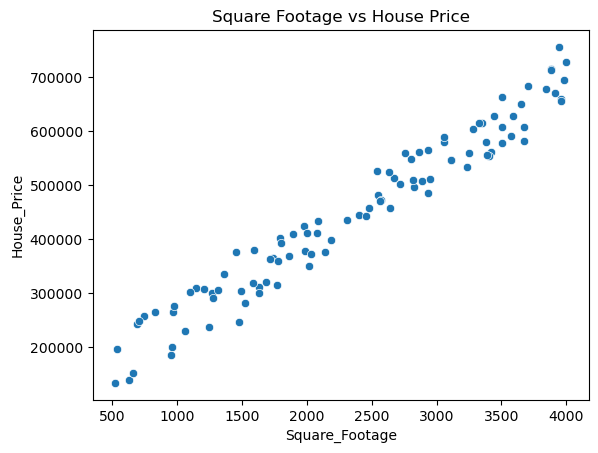

In [15]:
# Scatter plot (Square Footage vs House Price)
sns.scatterplot(x='Square_Footage', y='House_Price', data=df)
plt.title("Square Footage vs House Price")
plt.show()



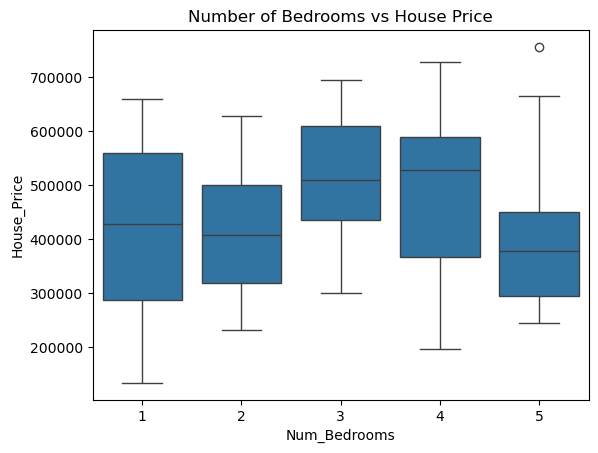

In [17]:
# Box plot (Number of Bedrooms vs House Price)
sns.boxplot(x='Num_Bedrooms', y='House_Price', data=df)
plt.title("Number of Bedrooms vs House Price")
plt.show()



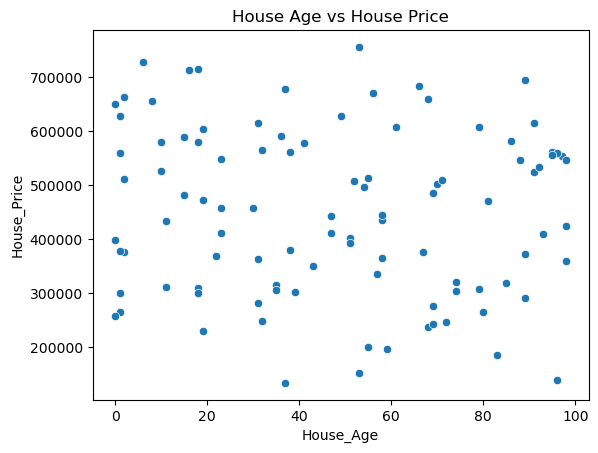

In [19]:
# Scatter plot (House Age vs House Price)
sns.scatterplot(x='House_Age', y='House_Price', data=df)
plt.title("House Age vs House Price")
plt.show()



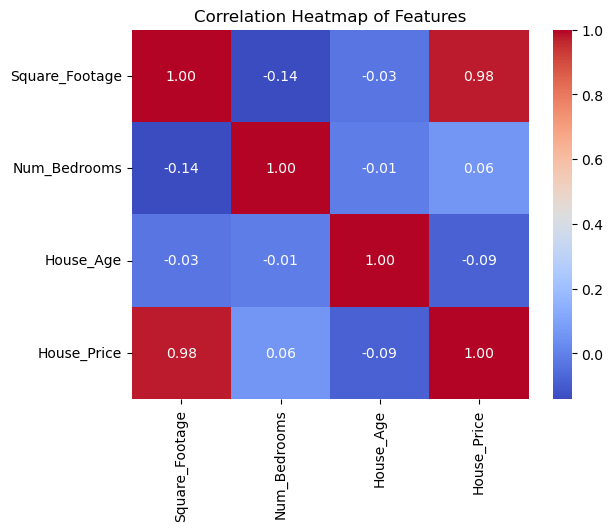

In [21]:
# Correlation heatmap to display correlation coefficients between features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


Split the Data

In [24]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df[['Square_Footage', 'Num_Bedrooms', 'House_Age']]
y = df['House_Price']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Model

In [27]:
from sklearn.linear_model import LinearRegression

# Create a Multiple Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

Evaluation

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 91726130.73039047
R2 Score: 0.9965233213503353


Visualization

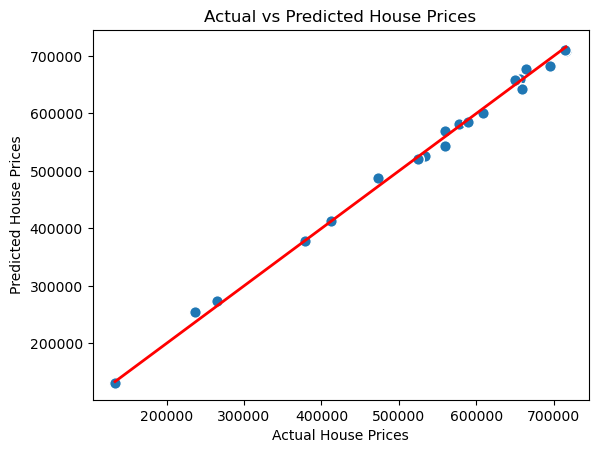

In [35]:
# Scatter plot comparing the actual vs predicted house prices
plt.scatter(y_test, y_pred, edgecolors='w', s=70)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()


Prediction Func

In [40]:
def predict_house_price(square_footage, num_bedrooms, house_age, model):
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })
    predicted_price = model.predict(input_features)
    return predicted_price[0]

# Example usage:
predicted_price = predict_house_price(2000, 3, 30, model)
print("Predicted House Price:", predicted_price)


Predicted House Price: 399387.97391235747


Feature Importance

          Feature   Coefficient
0  Square_Footage    151.233041
1    Num_Bedrooms  21294.459583
2       House_Age   -274.572639


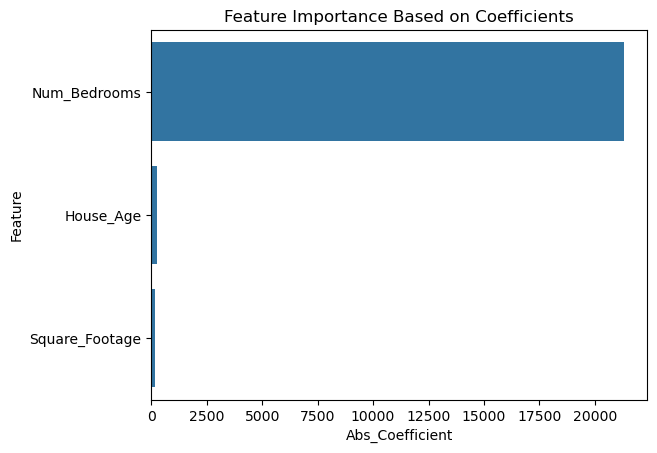

In [45]:
import numpy as np

# Feature importance in linear regression is based on the absolute value of the coefficients
coefficients = model.coef_
features = X.columns
importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Display feature importance
print(importance)

# Visualize feature importance
importance['Abs_Coefficient'] = np.abs(importance['Coefficient'])
importance.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)

sns.barplot(x='Abs_Coefficient', y='Feature', data=importance)
plt.title("Feature Importance Based on Coefficients")
plt.show()


Normalization

In [48]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE) and R2 score
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("Mean Squared Error (Scaled Data):", mse_scaled)
print("R2 Score (Scaled Data):", r2_scaled)


Mean Squared Error (Scaled Data): 91726130.73039211
R2 Score (Scaled Data): 0.9965233213503353


________________________________________________________________________________________________________________________________________________________